# Exploratory Data Analysis and Predictive Analytics on Diabetes Dataset

### Michael A. Akinola (other contributor: Afeez A. Oladokun)

### 1.0 Introduction

Exploratory Data Analysis (EDA) is an approach for data analysis that often uses statistical graphics and other data visualization methods to maximize insight into a data set. Most EDA techniques are graphical in nature with a few quantitative techniques. The reason for the heavy reliance on graphics is that by its very nature the main role of EDA is to open-mindedly explore, and graphics gives the analysts unparalleled power to do so, enticing the data to reveal its structural secrets, and being always ready to gain some new, often unsuspected, insight into the data. This analysis among other insights uncover underlying structure; extract important variables; detect outliers and anomalies; test underlying assumptions; develop parsimonious models; and determine optimal factor settings.

There are several tools that are useful for EDA, but EDA is characterized more by the attitude taken than by techniques. Some of the Graphical techniques used in EDA are Box plot, Histogram, Multivariate chart, Pareto chart, Scatter plot, Stem-and-leaf plot, Odds ratio. Dimensionality reduction techniques are Multidimensional scaling, Principal component analysis (PCA), Multilinear PCA, Nonlinear dimensionality reduction (NLDR) while Typical quantitative techniques are Median polish, Trimean, and Ordination.

In this work, we started by importing the data into R. Then probed and explored the data by inspecting the variable types, outlying and possibly wrong records, and other issues. We checked if there are any missing values which we applied listwise deletion, we inspected the frequency distribution of the target variable class and see, e.g., whether we have an unbalanced classification problem.

We also did Variable Screening which involves the exploration of the marginal (bivariate) associations between class and each attribute/predictor. For this, we deployed the parametric two-sample t test and the nonparametric Wilcoxon rank-sum test for continuous predictors; and Two-test of independence and Fisher's exact test for categorical predictors. We made our deductions and conclusions from the resultant p-values from each test for which a liberal threshold significance level, α = 0.25, was applied to remove a few unimportant predictors. This is a key step to reduce the dimension of predictors. We computed and visualized the correlation matrix choosing Pearson’s coefficient to gain more insight.

The work was concluded with Data partition. We partitioned the data into two parts, the training data, D1 and the test data, D2, using a ratio of 2:1.

In [21]:
# ==========
# LIBRARIES 
# ==========

#### Install ####

#install.packages("funModeling")
#install.packages("naniar")
#install.packages("nortest")
#install.packages("dplyr")

#### Import ####

library("funModeling")
library("naniar")
library("nortest")
library("dplyr")

### 2.0 Dataset

The dataset used for this work was fetched from University of California, Irvine, Machine Learning Repository. This dataset contains the signs and symptoms data of newly diabetic or would be diabetic patient. It is multivariate and its associated task is classification. The dataset contains 520 instances and 17 attributes. The dataset was donated by M. M. Faniqul Islam, Rahatara Ferdousi, Sadikur Rahman, and Humayra Yasmin Bushra on July 12, 2020. They reported that the mode of collection was by direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor. This proved that the dataset is a real data and not made up.

#### 2.1 Initial Data Inspection 

In [2]:
#### Bringing in the data #### 

diabetes_data <- read.csv(file="http://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv")

In [3]:
#### Dimension of data ####

("Data contains the following number of rows and columns respectively")
dim(diabetes_data)

[1] "Data contains the following number of rows and columns respectively"

[1] 520  17

In [4]:
#### Top six rows of data and Bottom six rows of data ####

("Top six rows:")
head(diabetes_data)

("Bottom six rows:")
tail(diabetes_data)

[1] "Top six rows:"

Age,Gender,Polyuria,Polydipsia,sudden.weight.loss,weakness,Polyphagia,Genital.thrush,visual.blurring,Itching,Irritability,delayed.healing,partial.paresis,muscle.stiffness,Alopecia,Obesity,class
40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive


[1] "Bottom six rows:"

,Age,Gender,Polyuria,Polydipsia,sudden.weight.loss,weakness,Polyphagia,Genital.thrush,visual.blurring,Itching,Irritability,delayed.healing,partial.paresis,muscle.stiffness,Alopecia,Obesity,class
515,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
516,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
517,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
518,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
519,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
520,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


#### 2.2 Structure and Metrics of data 

The str() function compactly display the internal structure of an R object (our dataset in this case). It is a diagnostic function and an alternative to summary. Ideally, only one line for each ‘basic’ structure is displayed. It is especially well suited to compactly display the (abbreviated) contents of (possibly nested) lists. The idea is to give reasonable output for any R object.
    
The df_status() function dispaly quantity and percentage of zeros (q_zeros and p_zeros respectevly). Same metrics for NA values (q_NA and p_na). Last two columns indicates data type and quantity of unique values.

The outputs of the two cells below showed the attribute information of the data as follows.

##### Predictor variables:
1.	Age: This ranges from 20 to 65 years old; 
2.	Sex: Male/Female; 
3.	Polyuria (production of abnormally large volumes of dilute urine): Yes/No;
4.	Polydipsia (abnormally great thirst as a symptom of disease); Yes/No;
5.	Sudden weight loss: Yes/No;
6.	Weakness: Yes/No;
7.	Polyphagia (abnormally strong sensation of hunger or desire to eat often leading to or accompanied by overeating): Yes/No;
8.	Genital thrush (a yeast infection): Yes/No;
9.	Visual blurring: Yes/No;
10.	Itching: Yes/No;
11.	Irritability: Yes/No;
12.	Delayed healing: Yes/No;
13.	Partial paresis (the weakening of a muscle or group of muscles): Yes/No;
14.	Muscle stiffness: Yes/No;
15.	Alopecia (a condition that causes hair to fall out in small patches, which can be unnoticeable): Yes/No;
16.	Obesity (a complex disease involving an excessive amount of body fat): Yes/No.

##### Target variable:
17.	Class: Positive/Negative.

We found out that 15 out of 16 predictor variables of our 17 attributes in our dataset are categorical. The target column is also categorical

In [5]:
#### Structure of data ####

str(diabetes_data)

'data.frame':	520 obs. of  17 variables:
 $ Age               : int  40 58 41 45 60 55 57 66 67 70 ...
 $ Gender            : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Polyuria          : Factor w/ 2 levels "No","Yes": 1 1 2 1 2 2 2 2 2 1 ...
 $ Polydipsia        : Factor w/ 2 levels "No","Yes": 2 1 1 1 2 2 2 2 2 2 ...
 $ sudden.weight.loss: Factor w/ 2 levels "No","Yes": 1 1 1 2 2 1 1 2 1 2 ...
 $ weakness          : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Polyphagia        : Factor w/ 2 levels "No","Yes": 1 1 2 2 2 2 2 1 2 2 ...
 $ Genital.thrush    : Factor w/ 2 levels "No","Yes": 1 1 1 2 1 1 2 1 2 1 ...
 $ visual.blurring   : Factor w/ 2 levels "No","Yes": 1 2 1 1 2 2 1 2 1 2 ...
 $ Itching           : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 1 2 2 2 ...
 $ Irritability      : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 2 2 2 ...
 $ delayed.healing   : Factor w/ 2 levels "No","Yes": 2 1 2 2 2 2 2 1 1 1 ...
 $ partial.paresis   : Factor w/ 2

In [6]:
#### Metrics of data: data types, zeros, infinite numbers, and missing values ####

df_status(diabetes_data)

             variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1                 Age       0       0    0    0     0     0 integer     51
2              Gender       0       0    0    0     0     0  factor      2
3            Polyuria       0       0    0    0     0     0  factor      2
4          Polydipsia       0       0    0    0     0     0  factor      2
5  sudden.weight.loss       0       0    0    0     0     0  factor      2
6            weakness       0       0    0    0     0     0  factor      2
7          Polyphagia       0       0    0    0     0     0  factor      2
8      Genital.thrush       0       0    0    0     0     0  factor      2
9     visual.blurring       0       0    0    0     0     0  factor      2
10            Itching       0       0    0    0     0     0  factor      2
11       Irritability       0       0    0    0     0     0  factor      2
12    delayed.healing       0       0    0    0     0     0  factor      2
13    partial.paresis    

### 3.0 Method

We approached this task in three different stages after importing the dataset into R – a free software environment for statistical computing and graphics. It compiles and runs on a wide variety of UNIX platforms, Windows and MacOS. We used this software on Windows.

Exploratory Data Analysis, EDA is the first stage of our approach. This involved the inspection of the dataset for variable types, outlying and possibly wrong records, and other issues. We checked if there are any missing values, inspected the frequency distribution of the target variable class to see, e.g., whether we have an unbalanced classification problem.

The second stage is Variable Screening which involves the exploration of the marginal (bivariate) associations between class and each attribute/predictor. For this, we deployed:
(a) The parametric two-sample t test and the nonparametric Wilcoxon rank-sum test for continuous predictors, and 
(b) Two-test of independence and Fisher's exact test for categorical predictors.
We made our deductions and conclusions from the resultant p-values from each test for which a liberal threshold significance level, α = 0.25, was applied to remove a few unimportant predictors. This is a key step to reduce the dimension of predictors. For more insight, we also computed and visualized the correlation matrix choosing Pearson’s coefficient. 

The third and final stage of this work is Data partition. We partitioned the data into two parts, the training data, D1 and the test data, D2, using a ratio of 2:1.

#### 3.1 Exploratory Data Analysis, EDA

##### 3.1.1 Missing check count/percentage

The two outputs below agrees with the data metrics above that our dataset is 100% complete without missing or wrong inputs. 

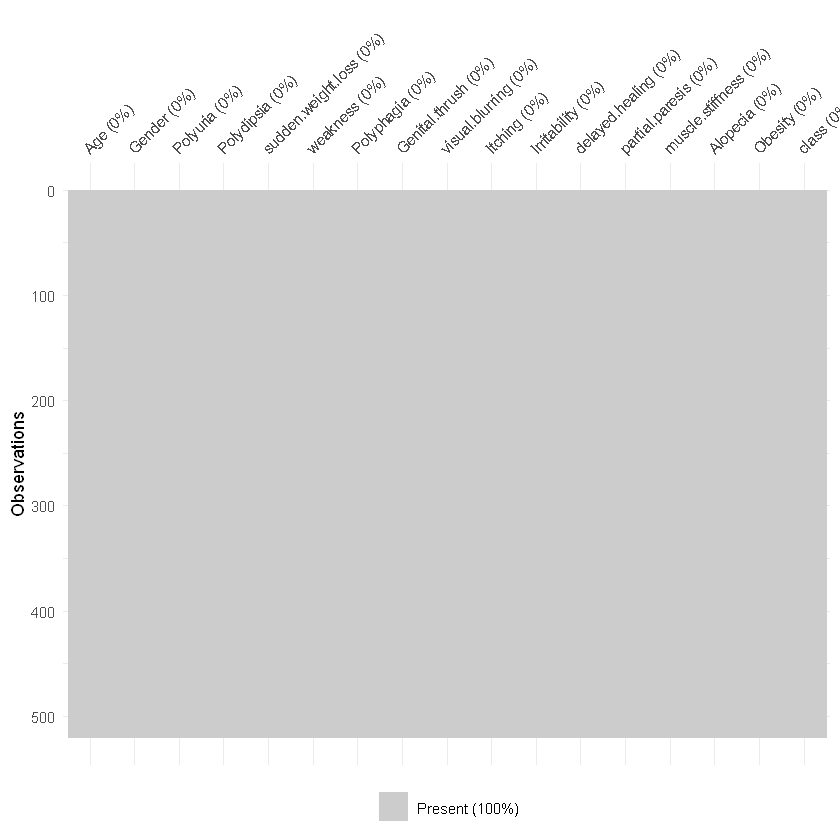

In [7]:
#### Missing check count/percentage

vis_miss(diabetes_data)

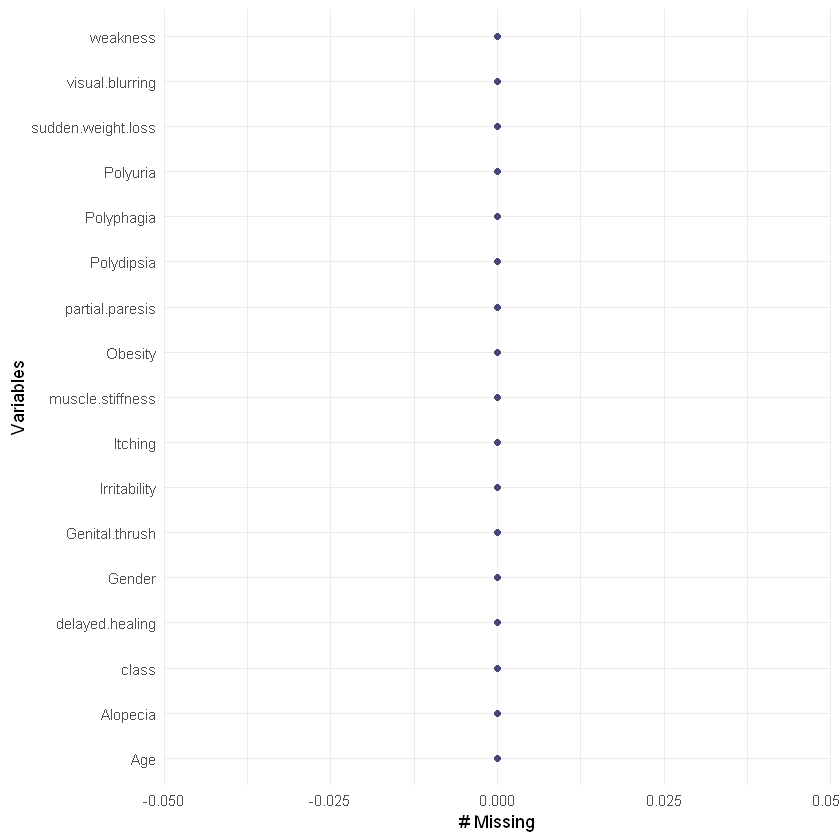

In [8]:
#### Visualizing Missing values ####

gg_miss_var(diabetes_data)

##### 3.1.2 Frequency distribution

The Frequency distribution of the target variable class showed that the ratio of Negatice class to Positive class in our dataset is 5:8. This is in our opinion not unbalanced.

Five number summary of the attribute Age showed that the minimum age is 16 years, maximum age is 90 years and mediam age is 47 years, 6 months. Drawing inference from approximately equal median and mean histogram plot, these suggest that the Age distribution is normal but Anderson Darling and Shapiro-Wilk's tests showed (with p-value < 0.05) that the Age distribution is significantly different from normal distribution. Boxplot showed two data points as outliers.

Most of other categorical predictors have balanced class except for Genital.thrush which has 22:78, Irritability which has 76:24, and Obesity which has 83:17 class ratio.

Overall, we set the ratio threshold of 1:2 as balanced class.

In [9]:
#### Frequency distribution of the target variable class ####

summary(diabetes_data$class)

Negative Positive 
     200      320

In [10]:
#### Five number summary of quantitative predictor ####

summary(diabetes_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   39.00   47.50   48.03   57.00   90.00 

In [11]:
#### Frequency distribution of categorical predictors ####

cat_predictors <- subset(diabetes_data, select= -c(Age, class))
summary(cat_predictors)

    Gender    Polyuria  Polydipsia sudden.weight.loss weakness  Polyphagia
 Female:192   No :262   No :287    No :303            No :215   No :283   
 Male  :328   Yes:258   Yes:233    Yes:217            Yes:305   Yes:237   
 Genital.thrush visual.blurring Itching   Irritability delayed.healing
 No :404        No :287         No :267   No :394      No :281        
 Yes:116        Yes:233         Yes:253   Yes:126      Yes:239        
 partial.paresis muscle.stiffness Alopecia  Obesity  
 No :296         No :325          No :341   No :432  
 Yes:224         Yes:195          Yes:179   Yes: 88  

##### Data visualization

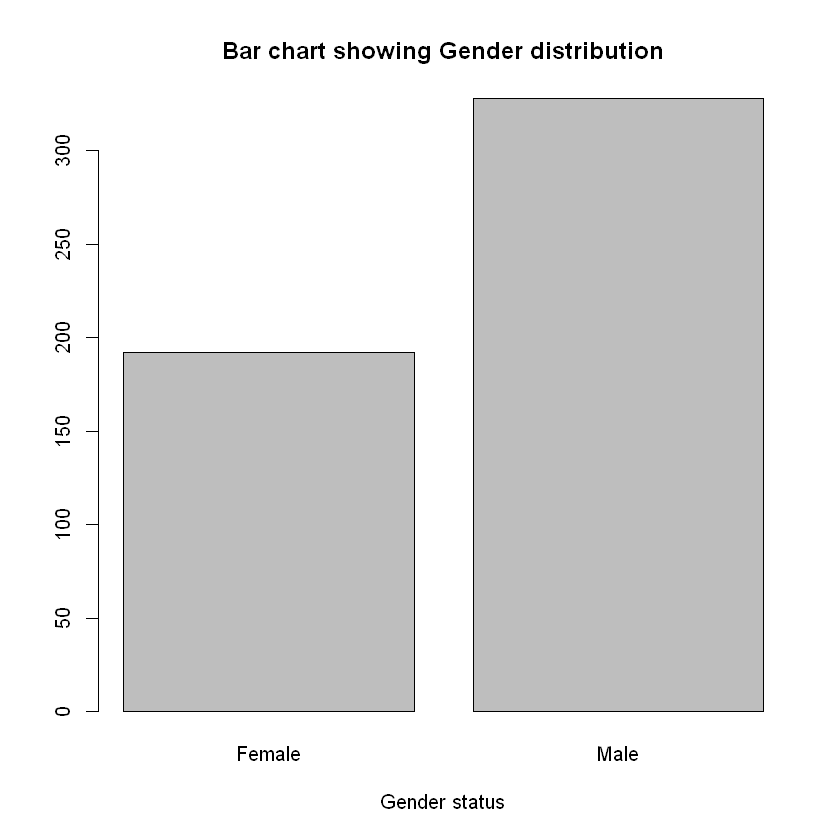

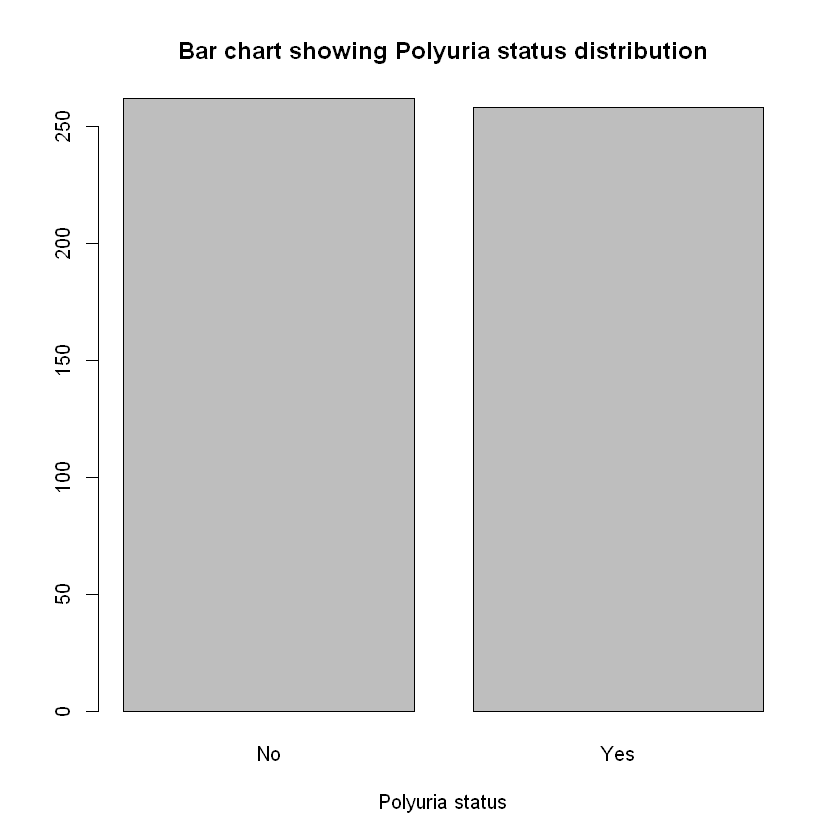

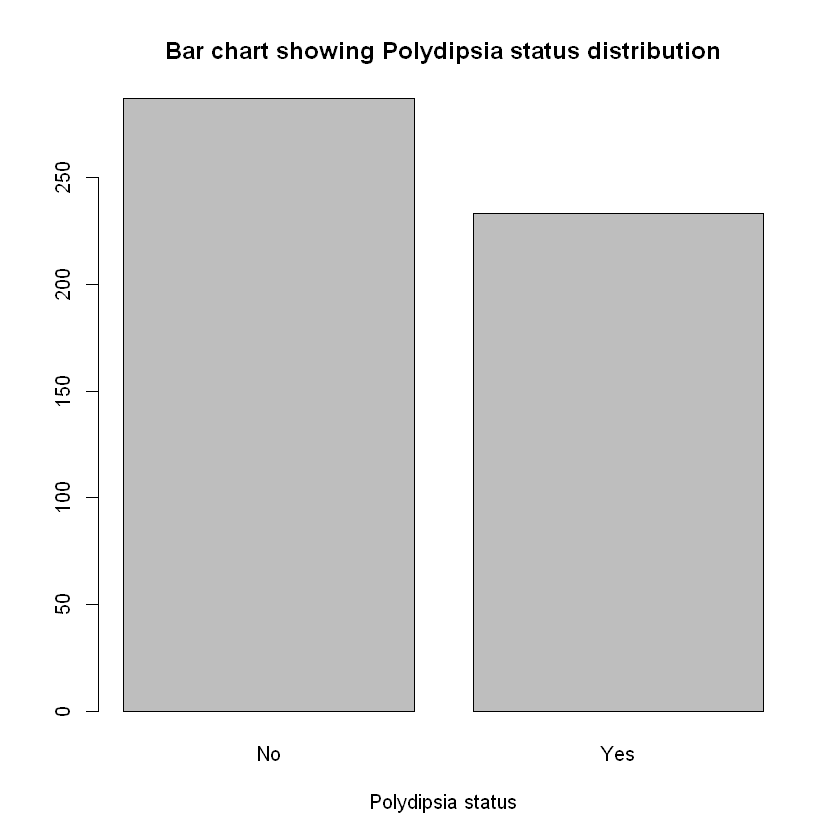

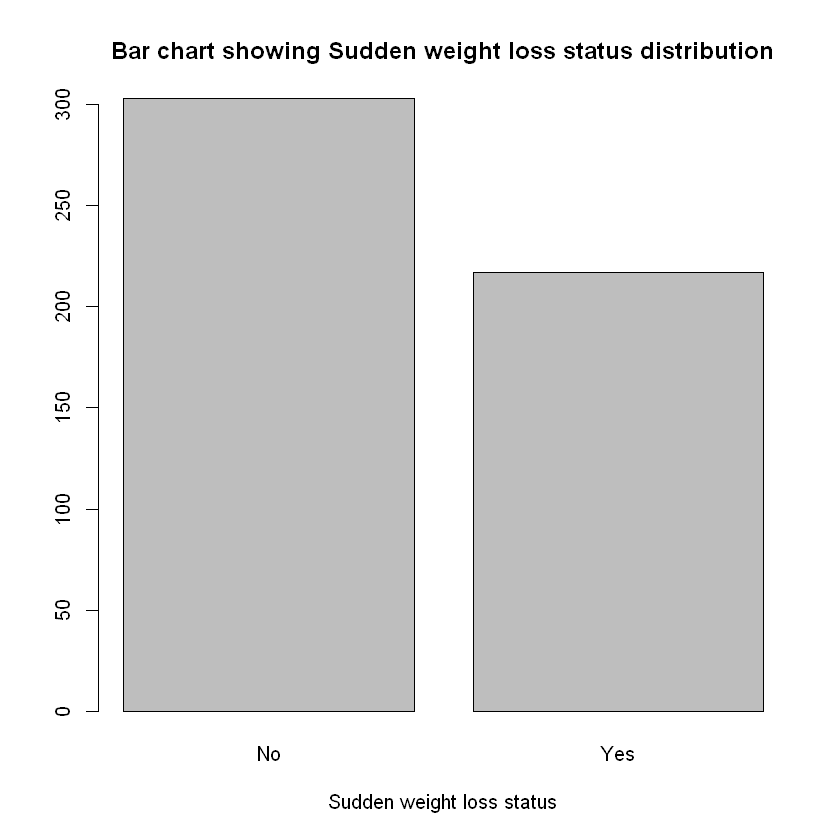

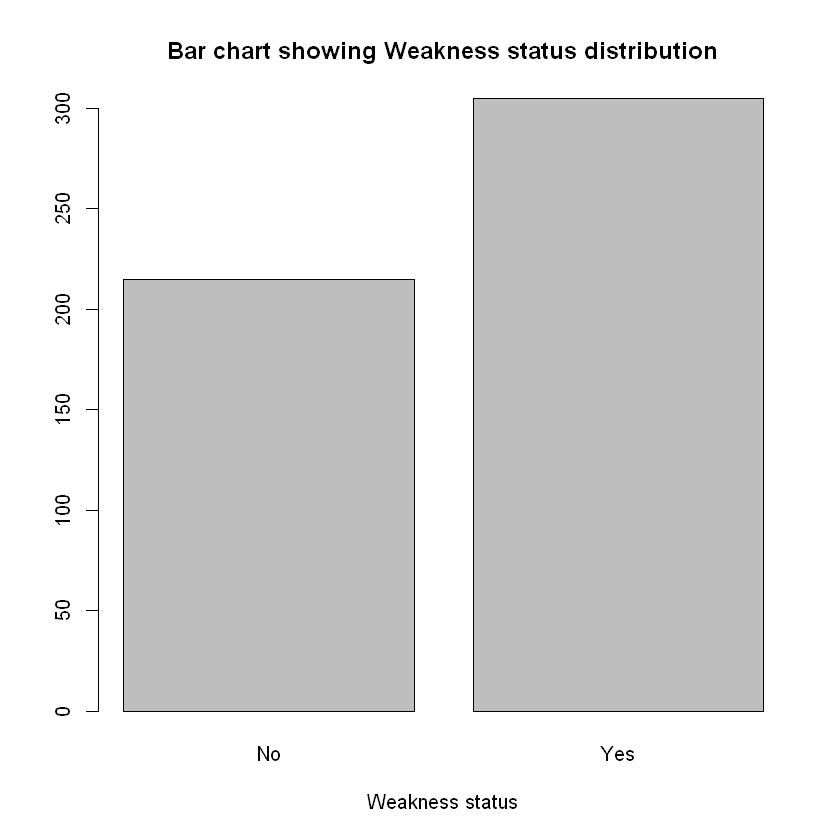

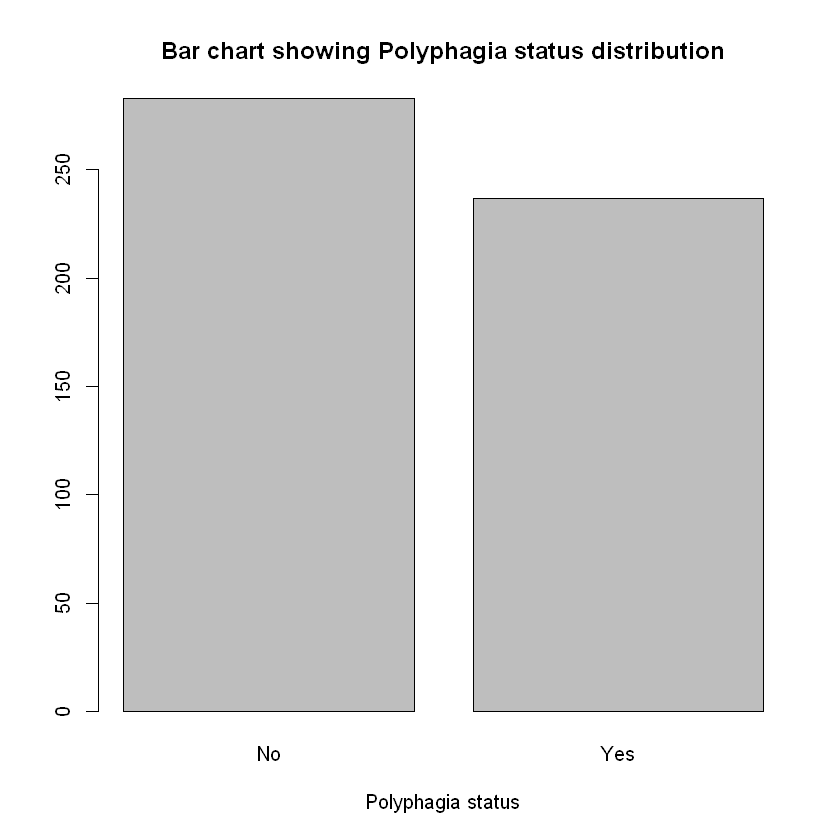

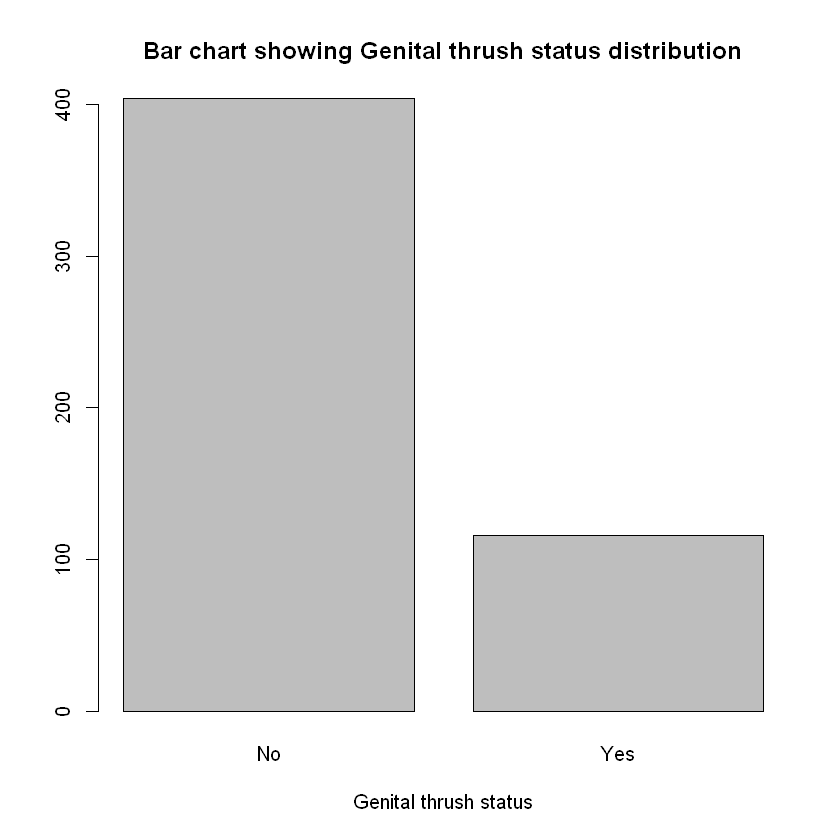

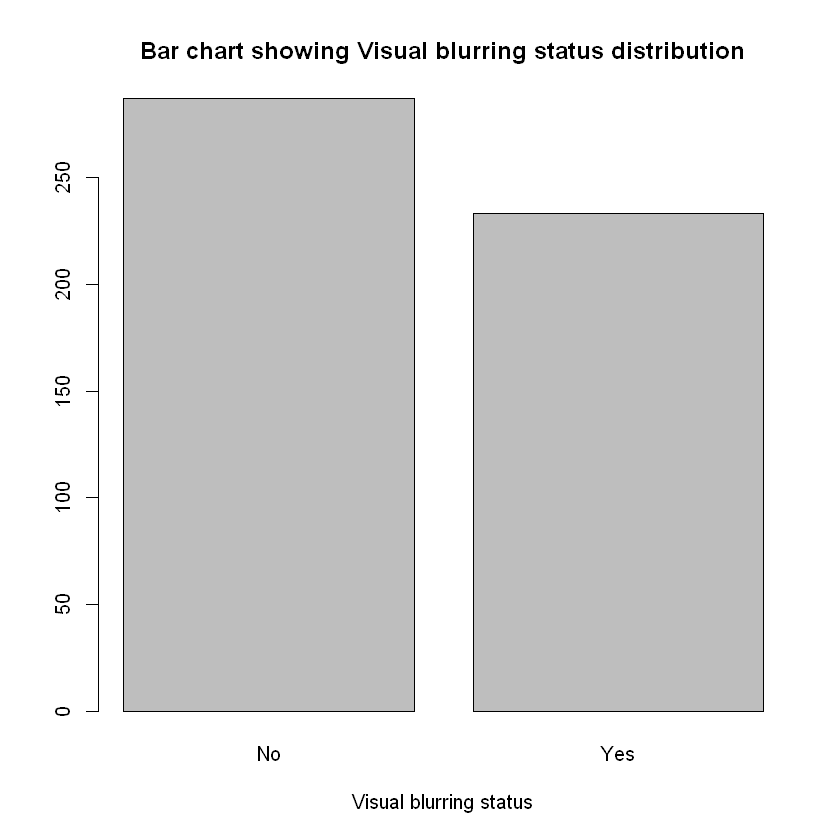

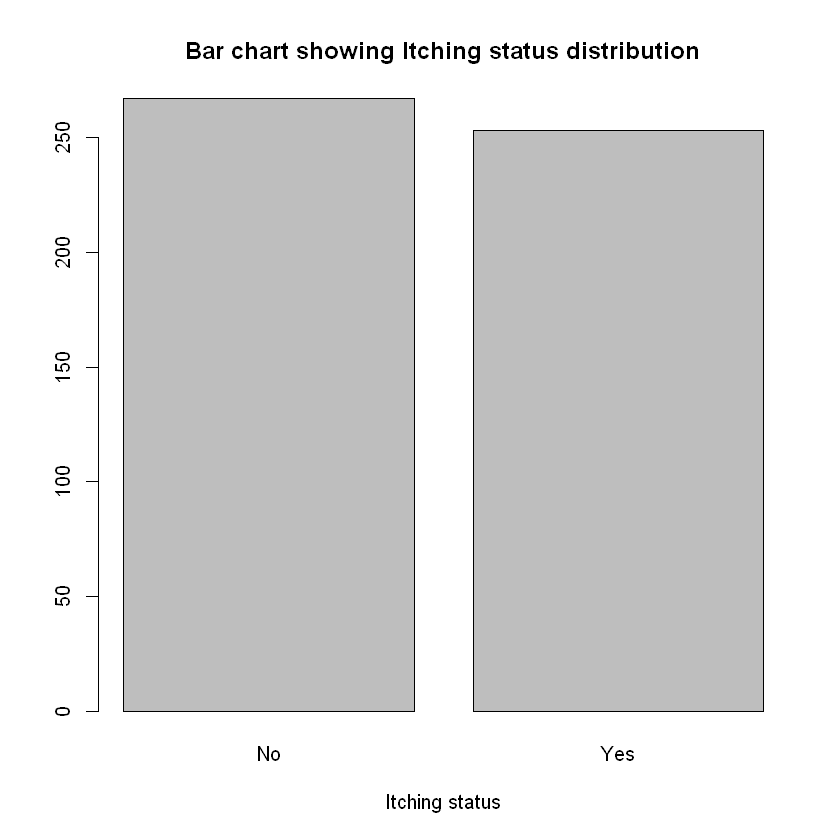

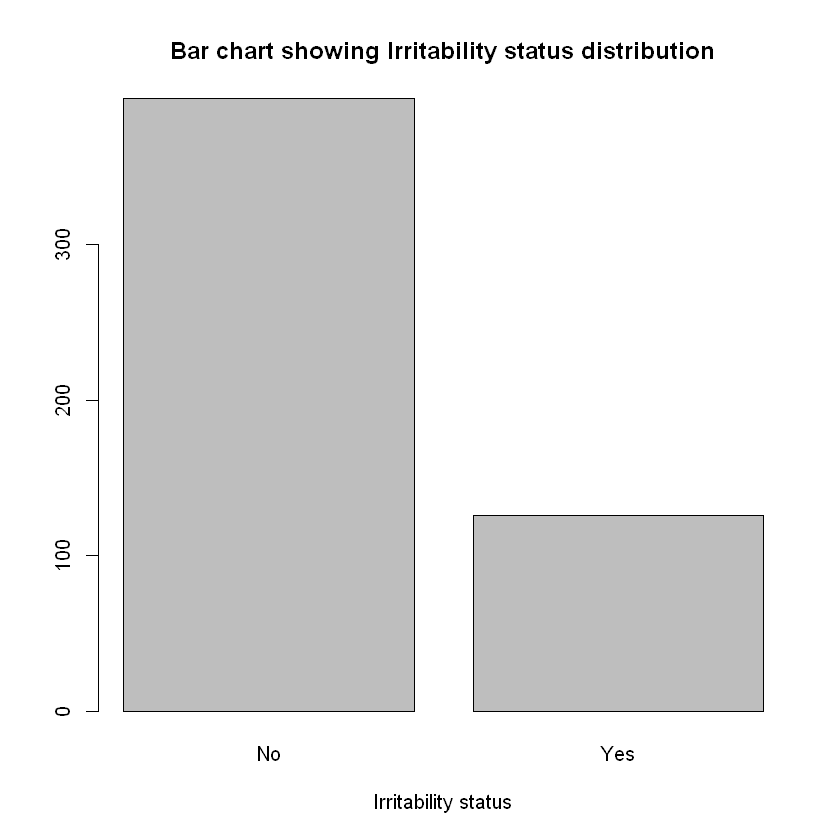

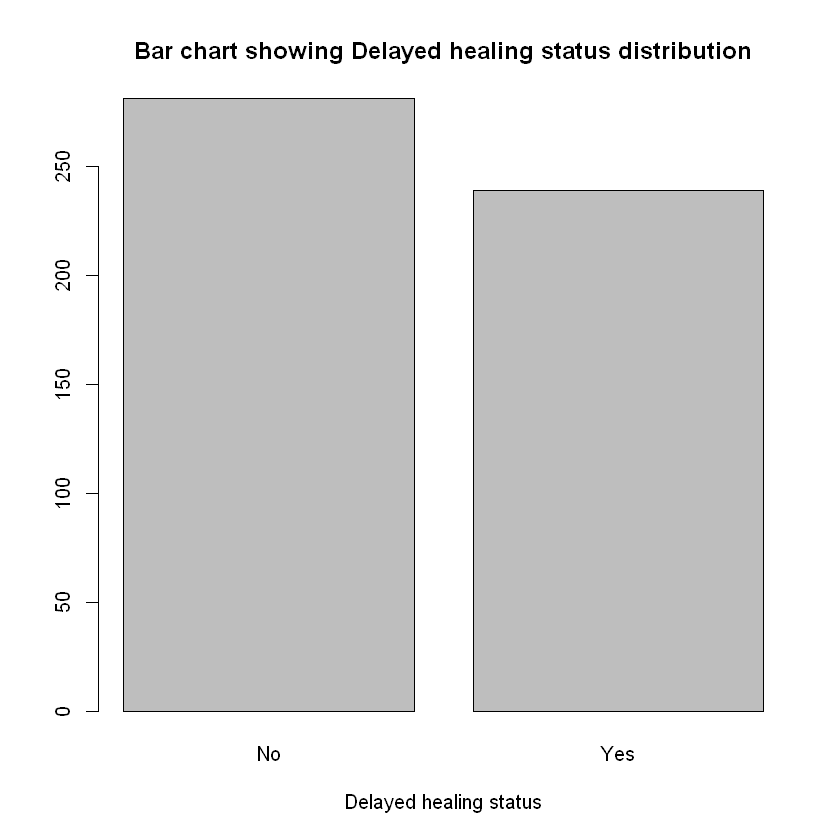

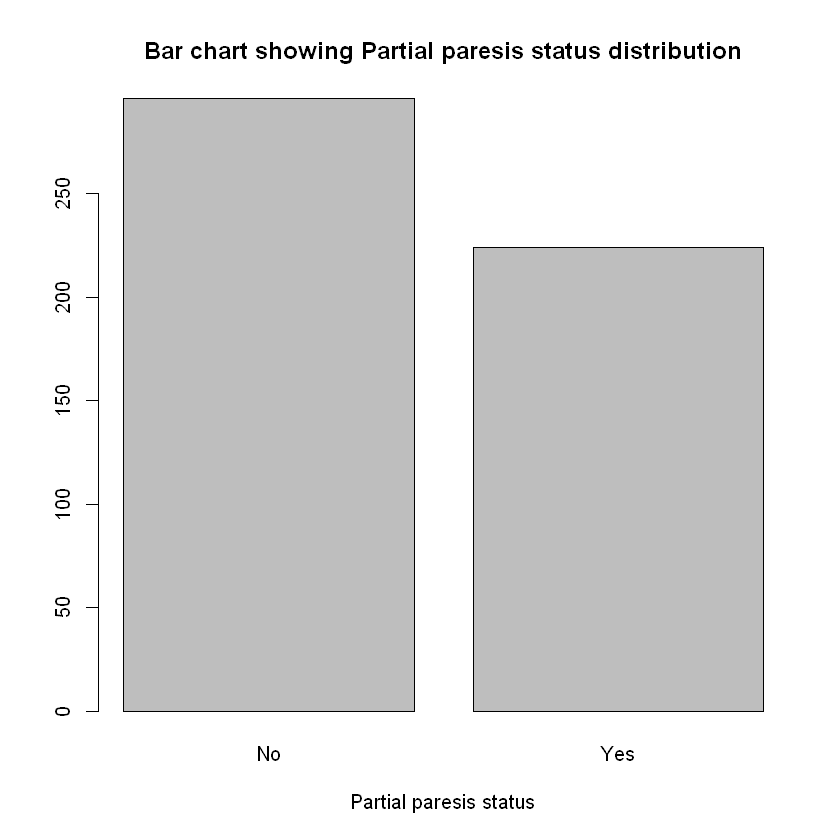

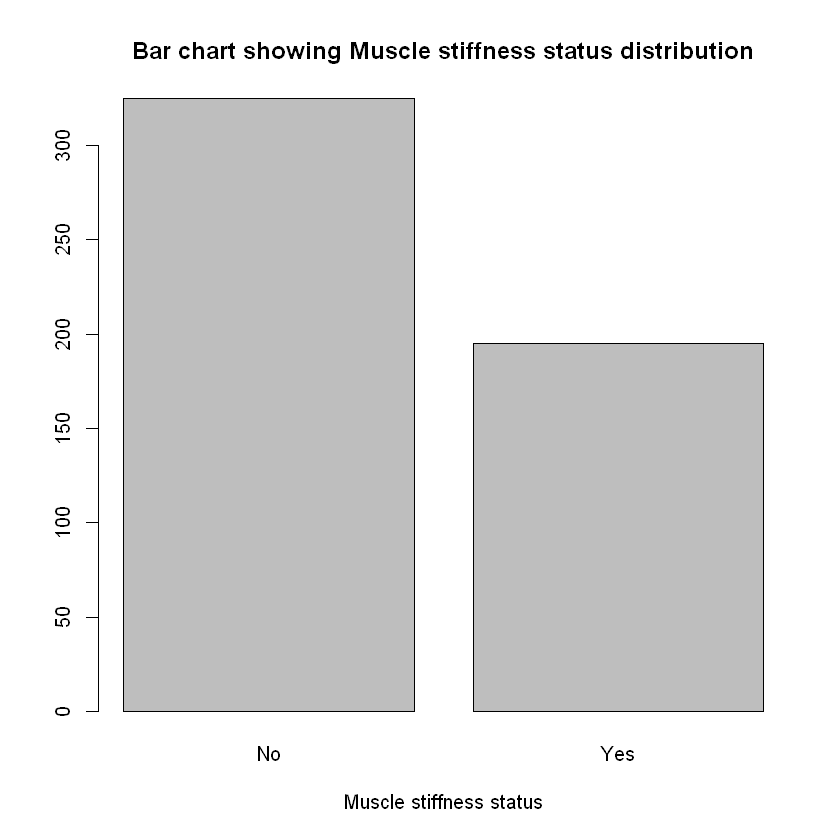

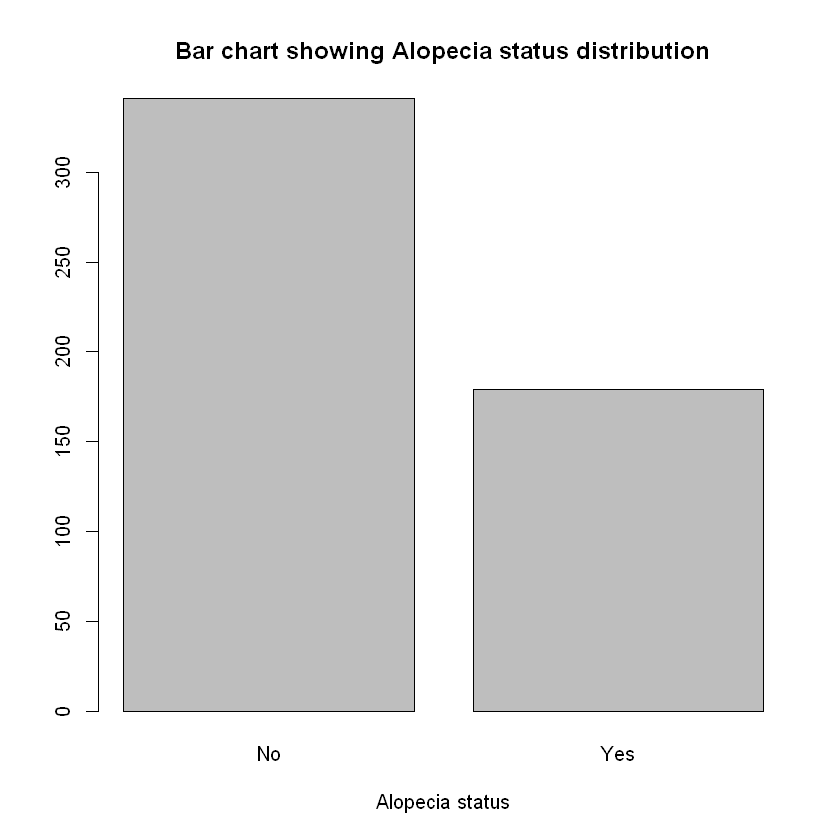

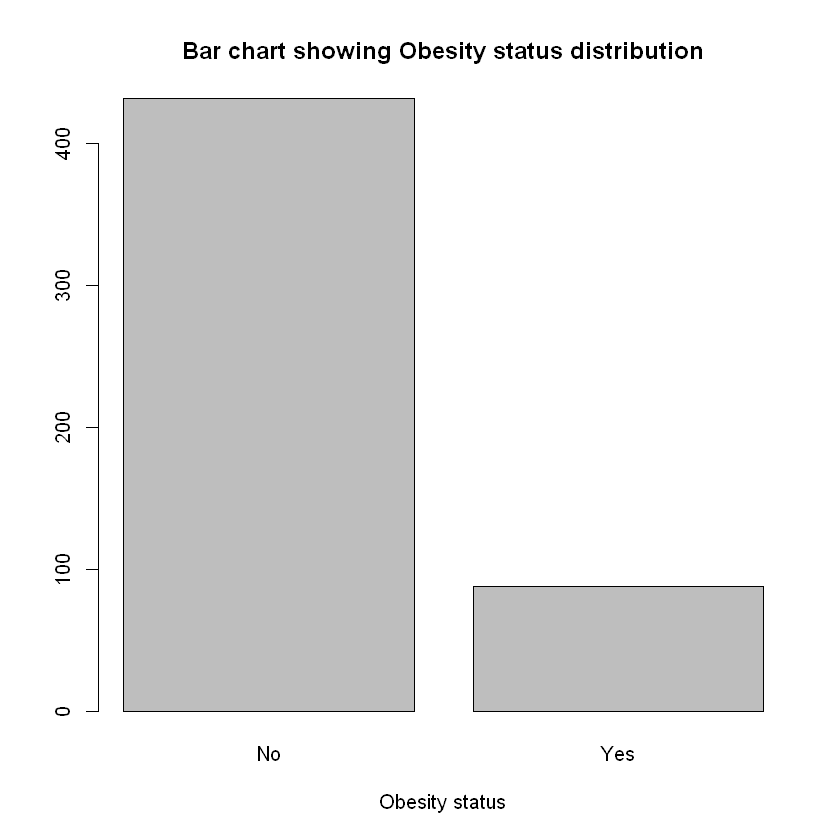

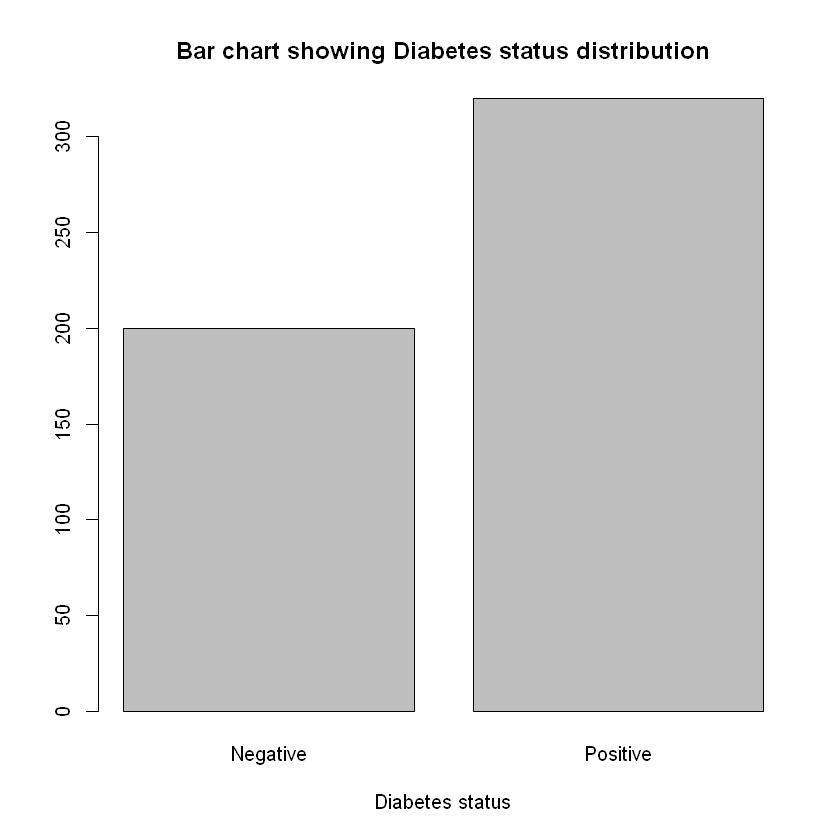

In [12]:
#### Visualizing the categorical attributes using barplot ####

layout(matrix(c(1,2),4,4))
barplot(table(diabetes_data$Gender), main="Bar chart showing Gender distribution", xlab="Gender status")
barplot(table(diabetes_data$Polyuria), main="Bar chart showing Polyuria status distribution", xlab="Polyuria status")
barplot(table(diabetes_data$Polydipsia), main="Bar chart showing Polydipsia status distribution", xlab="Polydipsia status")
barplot(table(diabetes_data$sudden.weight.loss), main="Bar chart showing Sudden weight loss status distribution", xlab="Sudden weight loss status")
barplot(table(diabetes_data$weakness), main="Bar chart showing Weakness status distribution", xlab="Weakness status")
barplot(table(diabetes_data$Polyphagia), main="Bar chart showing Polyphagia status distribution", xlab="Polyphagia status")
barplot(table(diabetes_data$Genital.thrush), main="Bar chart showing Genital thrush status distribution", xlab="Genital thrush status")
barplot(table(diabetes_data$visual.blurring), main="Bar chart showing Visual blurring status distribution", xlab="Visual blurring status")
barplot(table(diabetes_data$Itching), main="Bar chart showing Itching status distribution", xlab="Itching status")
barplot(table(diabetes_data$Irritability), main="Bar chart showing Irritability status distribution", xlab="Irritability status")
barplot(table(diabetes_data$delayed.healing), main="Bar chart showing Delayed healing status distribution", xlab="Delayed healing status")
barplot(table(diabetes_data$partial.paresis), main="Bar chart showing Partial paresis status distribution", xlab="Partial paresis status")
barplot(table(diabetes_data$muscle.stiffness), main="Bar chart showing Muscle stiffness status distribution", xlab="Muscle stiffness status")
barplot(table(diabetes_data$Alopecia), main="Bar chart showing Alopecia status distribution", xlab="Alopecia status")
barplot(table(diabetes_data$Obesity), main="Bar chart showing Obesity status distribution", xlab="Obesity status")
barplot(table(diabetes_data$class), main="Bar chart showing Diabetes status distribution", xlab="Diabetes status")

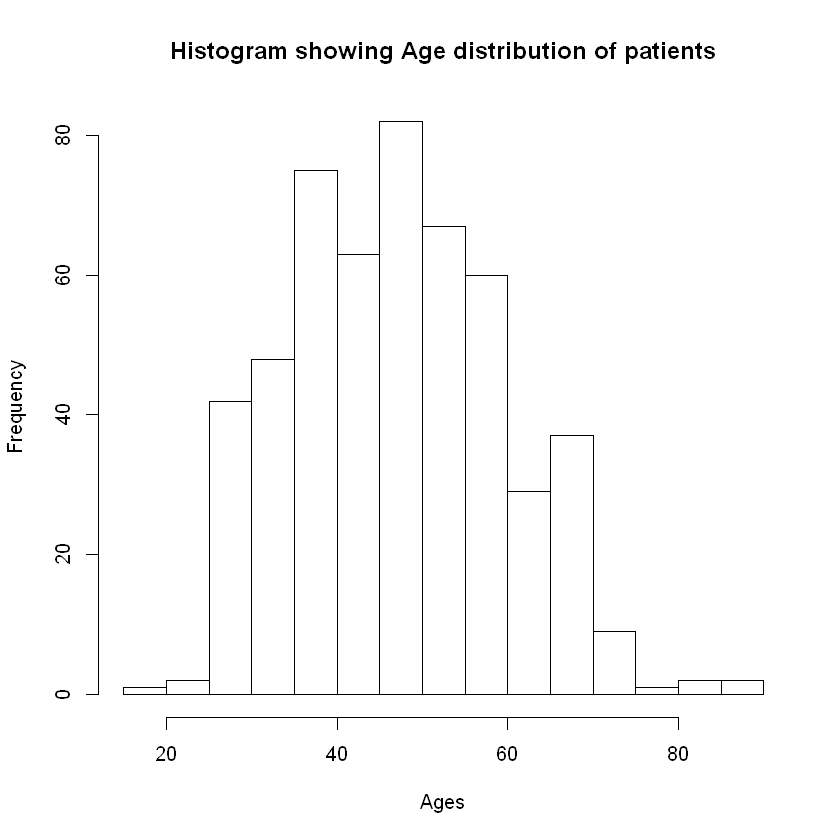

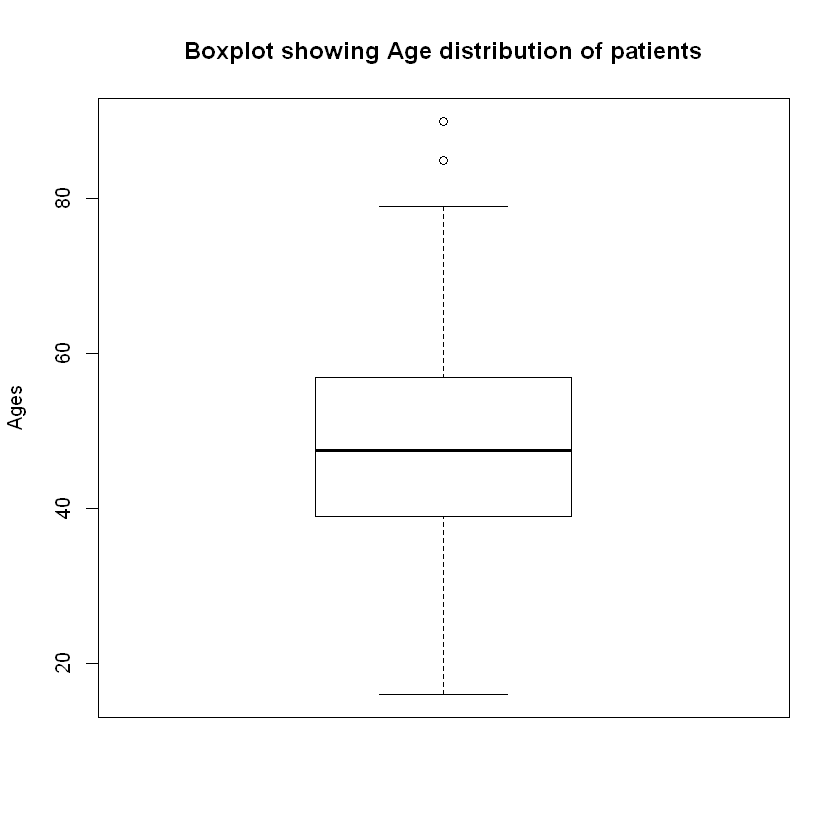

In [13]:
#### visualizing quantitative variable to check for distrbution ####

hist(diabetes_data$Age, main="Histogram showing Age distribution of patients", xlab="Ages")
boxplot(diabetes_data$Age, main="Boxplot showing Age distribution of patients", ylab="Ages")

In [14]:
#### Tests to check the distribution of Age

ad.test(diabetes_data$Age)
shapiro.test(diabetes_data$Age)


	Anderson-Darling normality test

data:  diabetes_data$Age
A = 1.9758, p-value = 4.871e-05



	Shapiro-Wilk normality test

data:  diabetes_data$Age
W = 0.98313, p-value = 9.992e-06


#### 3.2 Variable Screening

##### 3.2.1 Variables encoding
We assigned dummy variables to the categorical attributes using alphabetical order from 0 to 1.

##### 3.2.2 Tests
Wilcoxon rank-sum test performs one- and two-sample Wilcoxon tests on vectors of data; the latter is also known as ‘Mann-Whitney’ test and is deployed in this work. It is a non-parametric alternative to the unpaired two-samples t-test, which can be used to compare two independent groups of samples. The null and alternative hypothesis are as follows:

Null hypothesis (H0): the median Age of those who tested positive for diabetes is same as the median Age of those who tested negative.
Alternative hypothesis (H1): the median Age of those who tested positive for diabetes is significantly different from the median Age of those who tested negative.

Chi-square test examines whether rows and columns of a contingency table are statistically significantly associated. The null and alternative hypothesis are as follows:

Null hypothesis (H0): the row and the column variables of the contingency table are independent/not associated.
Alternative hypothesis (H1): row and column variables are dependent/associated.

We output the resultant p-value for each predictor and applied a liberal threshold significance of 0.25, to remove a few unimportant predictors. Applying a liberal threshold for statistical significance here helps prevent removing predictors that are apparently not associated with the target variable without considering other predictors but may become important in a model when adding (or adjusting for) other predictors.

##### Conclusion:
From the outputs of our tests below, we can conclude that the median Age of those who tested positive for diabetes is significantly different from the median Age of those who tested negative. Hence, the attribute Age is significant.
Also, we fail to reject the null hypothesis for Itching and delayed.healing from the Chi-square test of indepence carried out and conclude that they are both independent or not associated with the being diabetic or not.
Whether these variables (Itching and delayed.healing) would be screened out will be decided when we start working on the predictive modelling.

In [15]:
#### Changing the variable age from character type to numeric type ####

diabetes_data$Age <- as.numeric(as.character(diabetes_data$Age))

#### Making numeric values 1 and 0 for categorical variable ####

diabetes_data$Gender <- ifelse(diabetes_data$Gender=="Female", 0, 1)
diabetes_data$Polyuria <- ifelse(diabetes_data$Polyuria=="No", 0, 1)
diabetes_data$Polydipsia <- ifelse(diabetes_data$Polydipsia=="No", 0, 1)
diabetes_data$sudden.weight.loss <- ifelse(diabetes_data$sudden.weight.loss=="No", 0, 1)
diabetes_data$weakness <- ifelse(diabetes_data$weakness=="No", 0, 1)
diabetes_data$Polyphagia <- ifelse(diabetes_data$Polyphagia=="No", 0, 1)
diabetes_data$Genital.thrush <- ifelse(diabetes_data$Genital.thrush=="No", 0, 1)
diabetes_data$visual.blurring <- ifelse(diabetes_data$visual.blurring=="No", 0, 1)
diabetes_data$Itching <- ifelse(diabetes_data$Itching=="No", 0, 1)
diabetes_data$Irritability <- ifelse(diabetes_data$Irritability=="No", 0, 1)
diabetes_data$delayed.healing <- ifelse(diabetes_data$delayed.healing=="No", 0, 1)
diabetes_data$partial.paresis <- ifelse(diabetes_data$partial.paresis=="No", 0, 1)
diabetes_data$muscle.stiffness <- ifelse(diabetes_data$muscle.stiffness=="No", 0, 1)
diabetes_data$Alopecia <- ifelse(diabetes_data$Alopecia=="No", 0, 1)
diabetes_data$Obesity <- ifelse(diabetes_data$Obesity=="No", 0, 1)
diabetes_data$class <- ifelse(diabetes_data$class=="Negative", 0, 1)

In [16]:
head(diabetes_data)

Age,Gender,Polyuria,Polydipsia,sudden.weight.loss,weakness,Polyphagia,Genital.thrush,visual.blurring,Itching,Irritability,delayed.healing,partial.paresis,muscle.stiffness,Alopecia,Obesity,class
40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1


In [17]:
dim(diabetes_data)

[1] 520  17

In [18]:
#### Chi-Square test of independence on the categorical variable ####

chisq.test(diabetes_data$Polyuria, diabetes_data$class)
chisq.test(diabetes_data$Gender, diabetes_data$class)
chisq.test(diabetes_data$Polydipsia, diabetes_data$class)
chisq.test(diabetes_data$sudden.weight.loss, diabetes_data$class)
chisq.test(diabetes_data$weakness, diabetes_data$class)
chisq.test(diabetes_data$Polyphagia, diabetes_data$class)
chisq.test(diabetes_data$Genital.thrush, diabetes_data$class)
chisq.test(diabetes_data$visual.blurring, diabetes_data$class)
chisq.test(diabetes_data$Itching, diabetes_data$class)
chisq.test(diabetes_data$Irritability, diabetes_data$class)
chisq.test(diabetes_data$delayed.healing, diabetes_data$class)
chisq.test(diabetes_data$partial.paresis, diabetes_data$class)
chisq.test(diabetes_data$muscle.stiffness, diabetes_data$class)
chisq.test(diabetes_data$Alopecia, diabetes_data$class)
chisq.test(diabetes_data$Obesity, diabetes_data$class)

#### Wilcoxon rank sum test to compare two independent groups of samples ####

wilcox.test(diabetes_data$Age, diabetes_data$new_class, alternative="two.sided", exact = FALSE)


	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$Polyuria and diabetes_data$class
X-squared = 227.87, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$Gender and diabetes_data$class
X-squared = 103.04, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$Polydipsia and diabetes_data$class
X-squared = 216.17, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$sudden.weight.loss and diabetes_data$class
X-squared = 97.296, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$weakness and diabetes_data$class
X-squared = 29.768, df = 1, p-value = 4.87e-08



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$Polyphagia and diabetes_data$class
X-squared = 59.595, df = 1, p-value = 1.165e-14



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$Genital.thrush and diabetes_data$class
X-squared = 5.7921, df = 1, p-value = 0.0161



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$visual.blurring and diabetes_data$class
X-squared = 31.808, df = 1, p-value = 1.702e-08



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$Itching and diabetes_data$class
X-squared = 0.046235, df = 1, p-value = 0.8297



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$Irritability and diabetes_data$class
X-squared = 45.208, df = 1, p-value = 1.771e-11



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$delayed.healing and diabetes_data$class
X-squared = 0.96209, df = 1, p-value = 0.3267



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$partial.paresis and diabetes_data$class
X-squared = 95.388, df = 1, p-value < 2.2e-16



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$muscle.stiffness and diabetes_data$class
X-squared = 7.2887, df = 1, p-value = 0.006939



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$Alopecia and diabetes_data$class
X-squared = 36.064, df = 1, p-value = 1.909e-09



	Pearson's Chi-squared test with Yates' continuity correction

data:  diabetes_data$Obesity and diabetes_data$class
X-squared = 2.3275, df = 1, p-value = 0.1271



	Wilcoxon signed rank test with continuity correction

data:  diabetes_data$Age
V = 135460, p-value < 2.2e-16
alternative hypothesis: true location is not equal to 0


#### 3.3 Data Partition

Here, we partitioned the data into two parts, the training data, D1 and the test data, D2, with a ratio of 2:1. We then printed the first 6 rows of training data and the last 5 rows of testing data.

In [19]:
#### Splitting the data into train and test ####

set.seed(123)
n <- nrow(diabetes_data)
id.split <- sample(x = 1:2, size = n, replace = TRUE, prob=c(0.67, 0.33))
D1 <- diabetes_data[id.split == 1, ]
D2 <- diabetes_data[id.split == 2, ]

In [20]:
#### Printing the Top 6 rows of training data and Bottom 5 rows of test data ####

("Top 6 rows of training data, D1")
head(D1)

("Bottom 5 rows of test data, D2")
tail(D2, n = 5)

[1] "Top 6 rows of training data, D1"

,Age,Gender,Polyuria,Polydipsia,sudden.weight.loss,weakness,Polyphagia,Genital.thrush,visual.blurring,Itching,Irritability,delayed.healing,partial.paresis,muscle.stiffness,Alopecia,Obesity,class
1,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
3,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
6,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
7,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
9,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
10,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


[1] "Bottom 5 rows of test data, D2"

,Age,Gender,Polyuria,Polydipsia,sudden.weight.loss,weakness,Polyphagia,Genital.thrush,visual.blurring,Itching,Irritability,delayed.healing,partial.paresis,muscle.stiffness,Alopecia,Obesity,class
509,58,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0
513,43,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
515,54,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
518,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
520,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### References

Many parts of codes and notes from Dr. Masum Bhuiyan’s Predictive Analytics STAT 5290 class (Spring 2021)

https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm

http://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset

https://en.wikipedia.org/wiki/Exploratory_data_analysis

Islam, MM Faniqul, et al. 'Likelihood prediction of diabetes at early stage using data mining techniques.' Computer Vision and Machine Intelligence in Medical Image Analysis. Springer, Singapore, 2020. 113-125.

https://www.r-project.org/